In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['Melbourne_housing_FULL.csv']))
print(data.head(5))


Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (2).csv
         Suburb           Address  ...      ParkingArea      Price
0    Abbotsford     68 Studley St  ...          Carport        NaN
1  Airport West     154 Halsey Rd  ...  Detached Garage   840000.0
2   Albert Park    105 Kerferd Rd  ...  Attached Garage  1275000.0
3   Albert Park  85 Richardson St  ...           Indoor  1455000.0
4    Alphington      30 Austin St  ...          Parkade        NaN

[5 rows x 22 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Cleaning Inputs

1) Misssing Values Treatment

#dropna
#replace with median ,mode and mean
#back-fill
#forward-fill
#fillna
#imputer

In [113]:
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,lprice


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 23 columns):
Suburb           0 non-null object
Address          0 non-null object
Rooms            0 non-null int64
Type             0 non-null object
Method           0 non-null object
SellerG          0 non-null object
Date             0 non-null object
Distance         0 non-null float64
Postcode         0 non-null float64
Bedroom          0 non-null float64
Bathroom         0 non-null float64
Car              0 non-null float64
Landsize         0 non-null float64
BuildingArea     0 non-null object
YearBuilt        0 non-null float64
CouncilArea      0 non-null object
Latitude         0 non-null float64
Longtitude       0 non-null float64
Regionname       0 non-null object
Propertycount    0 non-null float64
ParkingArea      0 non-null object
Price            0 non-null float64
lprice           0 non-null float64
dtypes: float64(12), int64(1), object(10)
memory usage: 0.0+ bytes


In [23]:
data['Price'].describe()


count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [0]:
data = data[data['Price']>0]


In [102]:
data['Price'].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 22 columns):
Suburb           27247 non-null object
Address          27247 non-null object
Rooms            27247 non-null int64
Type             27247 non-null object
Method           27247 non-null object
SellerG          27247 non-null object
Date             27247 non-null object
Distance         27246 non-null float64
Postcode         27246 non-null float64
Bedroom          20806 non-null float64
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10670 non-null object
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null object
Latitude         20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27247 non-null object
Propertycount    27244 non-null float64
ParkingArea      27247 non-null object
Price            27247 non-null float64
dtypes: float64(11), in

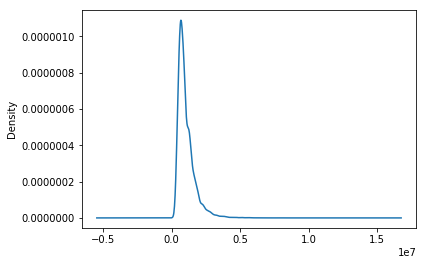

In [30]:
data['Price'].plot(kind='density')

In [31]:
data['Price'].skew()

2.5889693410528607

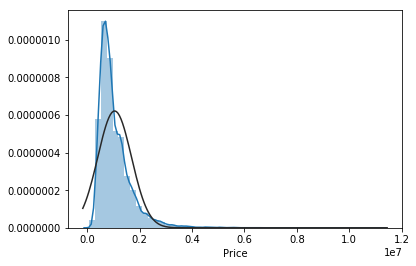

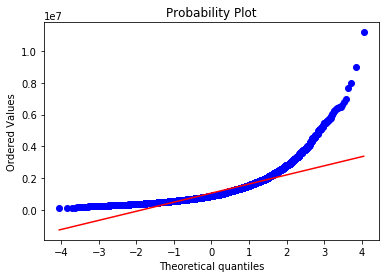

In [103]:
from scipy import stats
from scipy.stats import norm
# Deviation from Normality
norm.fit(data['Price'])
sns.distplot(data['Price'],fit=norm)
fig= plt.figure()
#QQ plot
stats.probplot(data['Price'],plot=plt)
plt.show()

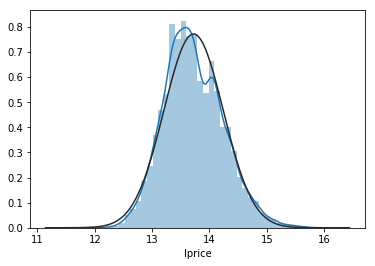

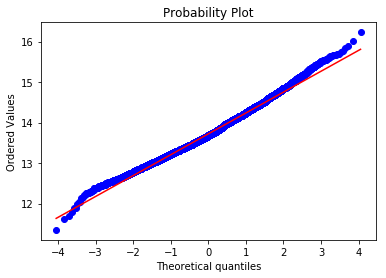

In [104]:
data['lprice'] = np.log(data['Price'])
data[['Price','lprice']].head()
norm.fit(data['Price'])
sns.distplot(data['lprice'],fit=norm)
fig= plt.figure()
#QQ plot
stats.probplot(data['lprice'],plot=plt)
plt.show()

In [55]:
data['lprice'].skew()

0.33590637843423793

In [0]:
### Distance

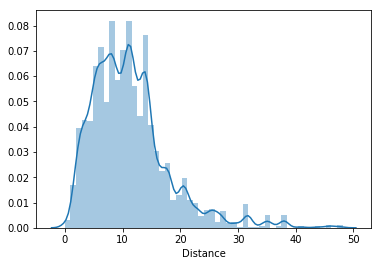

In [105]:
sns.distplot(data['Distance'].dropna())

In [106]:
data['Distance'].describe()

count    27246.000000
mean        11.280276
std          6.787469
min          0.000000
25%          6.400000
50%         10.500000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

In [0]:
data['Distance'].skew()
data['Distance'] = data['Distance'].fillna(data['Distance'].mean())

In [107]:
#We wil removevalues outside 3z or outliers
from scipy import stats
data= data[np.abs(stats.zscore(data['Distance']))<=3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [108]:
data['Distance'].skew()

nan

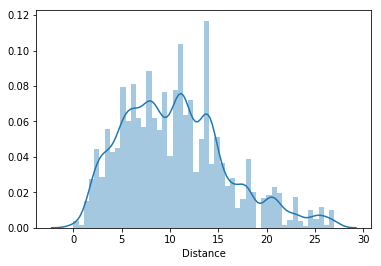

In [73]:
sns.distplot(data['Distance'])

### Rooms

In [112]:
data['Rooms'].value_counts()

Series([], Name: Rooms, dtype: int64)

nan


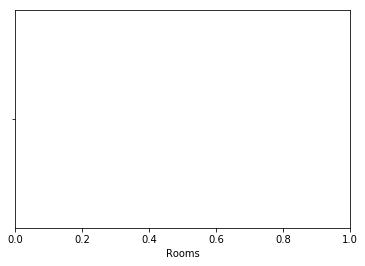

In [95]:
sns.boxplot(data['Rooms'])
print(data['Rooms'].skew())

In [116]:
q1 = data['Rooms'].quantile(0.25)
q3 = data['Rooms'].quantile(0.75)

IQR = q3-q1
IQR

2.0

In [0]:
data = data[~((data['Rooms']<(q1-1.5*IQR) )| (data['Rooms']>(q3+1.5*IQR)))]

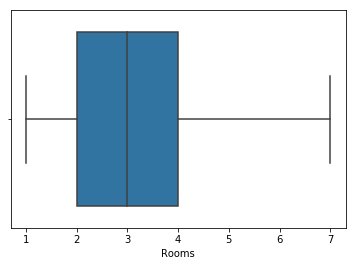

In [118]:
sns.boxplot(data['Rooms'])
#print(data['Rooms'].skew())

In [120]:
data['Postcode'] = data['Postcode'].fillna(data['Postcode'].mode()[0])



0

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34824 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34824 non-null object
Address          34824 non-null object
Rooms            34824 non-null int64
Type             34824 non-null object
Method           34824 non-null object
SellerG          34824 non-null object
Date             34824 non-null object
Distance         34823 non-null float64
Postcode         34824 non-null float64
Bedroom          26617 non-null float64
Bathroom         26608 non-null float64
Car              26108 non-null float64
Landsize         23028 non-null float64
BuildingArea     13752 non-null object
YearBuilt        15540 non-null float64
CouncilArea      34821 non-null object
Latitude         26853 non-null float64
Longtitude       26853 non-null float64
Regionname       34824 non-null object
Propertycount    34821 non-null float64
ParkingArea      34824 non-null object
Price            27224 non-null float64
dtypes: float64(11), in

In [123]:
data['Bedroom'].value_counts()

3.0     11881
4.0      6347
2.0      5777
5.0      1427
1.0       965
6.0       166
7.0        30
0.0        17
10.0        2
9.0         2
30.0        1
20.0        1
8.0         1
Name: Bedroom, dtype: int64

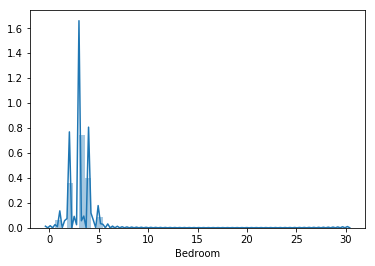

In [126]:
sns.distplot(data['Bedroom'].dropna())

In [0]:
#Bedroom is not exactly continuos 
q1 = data['Bedroom'].quantile(0.25)
q3 = data['Bedroom'].quantile(0.75)

IQR = q3-q1
IQR
data = data[~((data['Bedroom']<(q1-1.5*IQR) )| (data['Bedroom']>(q3+1.5*IQR)))]

data['Bedroom'] = data['Bedroom'].fillna(data['Bedroom'].median())

3.0

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,Landsize_missing
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,1.0,1.0,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN,0
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0,0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0,0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0,0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,2.0,1.0,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN,0


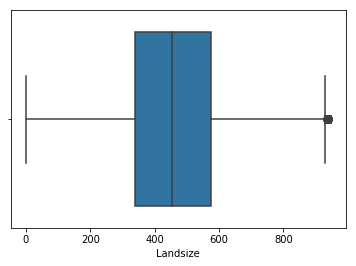

In [151]:
# Landsize
sns.boxplot(data['Landsize'].dropna())
data['Landsize_missing'] = data['Landsize'].apply(lambda x: 1 if x>=np.NaN else 0)

data.head()


In [152]:
data['Landsize_missing'].value_counts()

0    33456
Name: Landsize_missing, dtype: int64

In [132]:
data['Landsize'].describe()

count     23028.000000
mean        593.035869
std        3399.685534
min           0.000000
25%         224.000000
50%         520.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

In [0]:
q1 = data['Landsize'].quantile(0.25)
q3 = data['Landsize'].quantile(0.75)

IQR = q3-q1
IQR
data = data[~((data['Landsize']<(q1-1.5*IQR) )| (data['Landsize']>(q3+1.5*IQR)))]


In [0]:
#data['Landsize'] = data['Landsize'].fillna(data['Landsize'].mean())
data['Landsize'] = data['Landsize'].fillna(method= 'ffill')

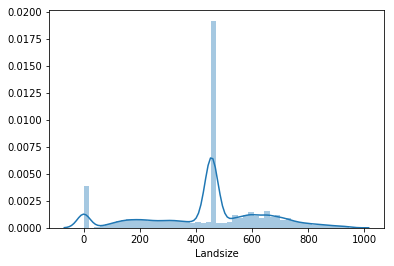

In [147]:
sns.distplot(data['Landsize'])

In [148]:
data['Landsize'].describe()

count    33456.000000
mean       441.088848
std        208.961681
min          0.000000
25%        340.000000
50%        455.163233
75%        576.000000
max        946.000000
Name: Landsize, dtype: float64

###Exploratory Data Analysis
##Bivariate Analysis

In [153]:
data['Type'].value_counts()


h    23091
u     6835
t     3530
Name: Type, dtype: int64

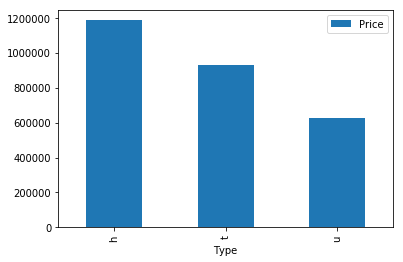

In [164]:
df = data.groupby('Type').agg({'Price':'mean'}).plot.bar()

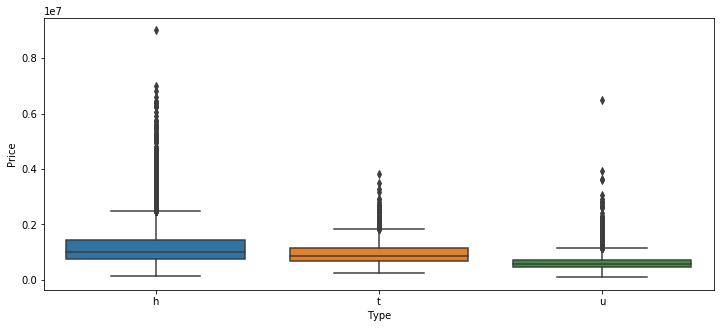

In [172]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Type',y='Price',data=data)

In [173]:
q1 = data['Price'].quantile(0.25)
q2 = data['Price'].quantile(0.5)
q3 = data['Price'].quantile(0.75)
print(q1,q2,q3)

636000.0 870000.0 1285000.0


In [0]:
def proce_cat(pt):
  d= {1:'low' , 2:'Mid',3:'High',4:'VHigh'}
  if pt<q1:
    return d[1]
  elif q1<=pt<q2:
    return d[2]
  elif q2<=pt<q3:
    return d[3]
  else:
    return d[4]
  

In [0]:
data['Price_cat'] = data['Price'].apply(proce_cat)

In [198]:
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,Landsize_missing,Price_cat
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,1.0,1.0,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN,0,VHigh
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0,0,Mid
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0,0,High
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0,0,VHigh
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,2.0,1.0,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN,0,VHigh


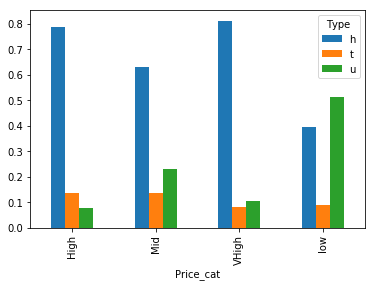

<Figure size 864x360 with 0 Axes>

In [204]:
pd.crosstab(data['Price_cat'],data['Type'],normalize=0).plot.bar(stacked=False)
plt.figure(figsize=(12,5))
d= {1:'low' , 2:'Mid',3:'High',4:'VHigh'}

In [0]:
#the chart shows that low price segment forms the maximum in Type-U and Among all types Hogh proce segment was maimyum for Type -H

In [0]:
#Distance is a continous column.
data['Price_High'] = data['Price'].apply(lambda x: 'High' if x>q3 else 'Low')

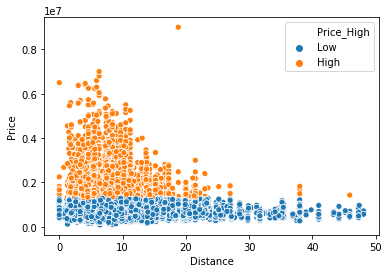

In [214]:
sns.scatterplot('Distance','Price',hue='Price_High',data=data)

In [215]:
q1 = data['Distance'].quantile(0.25)
q2 = data['Distance'].quantile(0.5)
q3 = data['Distance'].quantile(0.75)
print(q1,q2,q3)
def proce_dist(pt):
  d= {1:'vless' , 2:'less',3:'More',4:'Most'}
  if pt<q1:
    return d[1]
  elif q1<=pt<q2:
    return d[2]
  elif q2<=pt<q3:
    return d[3]
  else:
    return d[4]
data['Distance_cat'] = data['Distance'].apply(proce_dist)

6.4 10.4 14.0


In [0]:
pd.crosstab(data['Distance_cat'],data['Price_'],normalize=0).plot.bar(stacked=False)
plt.figure(figsize=(12,5))
d= {1:'low' , 2:'Mid',3:'High',4:'VHigh'}